In [4]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
# Load the dataset
data = pd.read_csv('Titanic.csv')  # Provide the correct path to your dataset

# Select relevant features and target variable
selected_features = ['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'
X = data[selected_features]
y = data[target]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Handle missing values
X.fillna(0, inplace=True)  # Replace missing values with 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [7]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# the goal is to predict the probability that an instance belongs to a particular class

# the main idea is to tell weath er the passenger survived or not

In [8]:
input_size = X_train.shape[1]  # Number of input features
model = LogisticRegression(input_size)

In [9]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [10]:
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 61.3487
Epoch [200/1000], Loss: 57.5000
Epoch [300/1000], Loss: 61.8542
Epoch [400/1000], Loss: 61.4521
Epoch [500/1000], Loss: 61.1921
Epoch [600/1000], Loss: 61.1835
Epoch [700/1000], Loss: 61.1755
Epoch [800/1000], Loss: 61.0476
Epoch [900/1000], Loss: 60.9143
Epoch [1000/1000], Loss: 58.8859


In [11]:
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predicted_classes = (test_outputs >= 0.5).squeeze().int()

accuracy = (predicted_classes == y_test_tensor).float().mean()
print(f'Accuracy on test set: {accuracy.item()*100:.2f}%')

Accuracy on test set: 41.34%


In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: x and y must be the same size

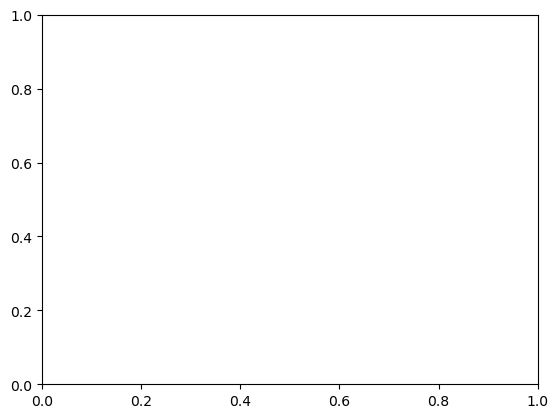

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X_test_tensor and predicted as defined earlier
# Convert predicted probabilities to a binary classification decision
predicted_class = (predicted > 0.5).astype(int)

# Visualize predicted probabilities and true labels
plt.scatter(X_test_tensor, predicted, label='Predicted probabilities', alpha=0.5)
plt.scatter(X_test_tensor, y_test, label='True labels', marker='x', color='red', alpha=0.5)
plt.xlabel('Input Feature')
plt.ylabel('Probability of Survival / True Label')
plt.legend()
plt.show()


NameError: name 'predicted' is not defined

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
titanic_data = pd.read_csv('Titanic.csv')  # Replace with the actual path to your dataset

# Preprocess the data
titanic_data.dropna(inplace=True)
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = titanic_data['Survived']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

input_size = X_train.shape[1]
model = LogisticRegression(input_size)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predicted_labels = (test_outputs >= 0.5).float()
    accuracy = (predicted_labels == y_test_tensor).float().mean()
    print(f'Test Accuracy: {accuracy.item():.4f}')


Epoch [100/1000], Loss: 0.6345
Epoch [200/1000], Loss: 0.5761
Epoch [300/1000], Loss: 0.5391
Epoch [400/1000], Loss: 0.5147
Epoch [500/1000], Loss: 0.4978
Epoch [600/1000], Loss: 0.4858
Epoch [700/1000], Loss: 0.4770
Epoch [800/1000], Loss: 0.4704
Epoch [900/1000], Loss: 0.4653
Epoch [1000/1000], Loss: 0.4613
Test Accuracy: 0.7568


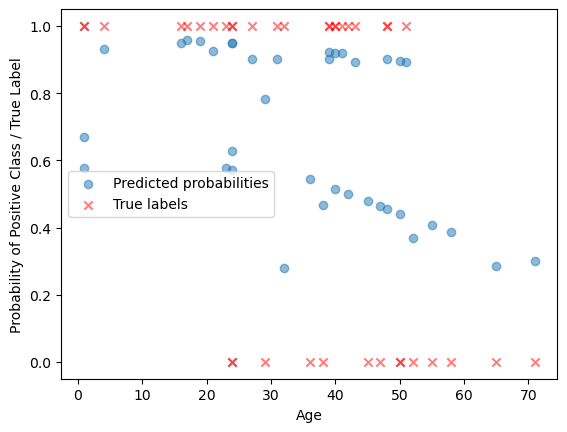

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming you have already loaded and preprocessed the Titanic dataset
# X should be your feature matrix, and y should be the target labels (survived or not)

# Choose a single feature for visualization
selected_feature = 'Age'  # Replace with the feature 

# Extract the selected feature from X
selected_feature_values = X_test[selected_feature]

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the selected feature values
predicted_probabilities = model.predict_proba(X_test)[:, 1]  # Probabilities of positive class

# Visualize predicted probabilities and true labels
plt.scatter(selected_feature_values, predicted_probabilities, label='Predicted probabilities', alpha=0.5)
plt.scatter(selected_feature_values, y_test, label='True labels', marker='x', color='red', alpha=0.5)
plt.xlabel(selected_feature)
plt.ylabel('Probability of Positive Class / True Label')
plt.legend()
plt.show()


# The main goal is to build a model that can predict whether a  given passenger survived the sinking of the Titanic (label 1) or did not survive (label 0)

# The loss is decreasing gradually when epoch increases

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset
Boston= pd.read_csv('HousingData.csv')  # Replace with the actual path to your dataset

# Preprocess the data
Boston.dropna(inplace=True)
selected_features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS']
target = 'MEDV'

X = Boston[selected_features]
y = Boston[target]



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define the linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        
    def forward(self, x):
        return self.linear(x)

input_size = X_train.shape[1]
model = LinearRegression(input_size)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    mse = criterion(test_outputs, y_test_tensor)
    print(f'Test Mean Squared Error: {mse.item():.4f}')


ValueError: could not determine the shape of object type 'Series'